In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
def perform_pca(data, k=2):
    """
    Perform PCA from scratch.

    Parameters:
    - data: (numpy array) the input data
    - k: (int) the number of principal components to retain

    Returns:
    - projected_data: data projected onto k principal components
    - eigenvalues: eigenvalues of the covariance matrix
    - eigenvectors: eigenvectors of the covariance matrix (principal components)
    """
    # Center the data
    mean_data = np.mean(data, axis=0)  #mean across row
    centered_data = data - mean_data

    # Calculate covariance matrix
    cov_matrix = np.cov(centered_data.T)

    # Perform eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and eigenvectors by descending eigenvalues
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select the top k eigenvalues and eigenvectors
    selected_eigenvectors = eigenvectors[:, :k]

    # Project data onto the selected principal components
    projected_data = centered_data.dot(selected_eigenvectors)

    return projected_data, eigenvalues[:k], selected_eigenvectors

In [ ]:
np.random.seed(0)
num_points = 200
radius = 10
angles = np.linspace(0, 2 * np.pi, num_points)
x_circle = radius * np.cos(angles) + np.random.normal(0, 0.5, num_points)
y_circle = radius * np.sin(angles) + np.random.normal(0, 0.5, num_points)
circle_data = np.vstack((x_circle, y_circle)).T

In [ ]:
print(x_circle.shape)

(200,)


In [ ]:
print(circle_data.shape)

(200, 2)


In [ ]:
print(circle_data)

[[ 10.88202617  -0.18459092]
 [ 10.1950945    0.19599591]
 [ 10.46943753   1.18088611]
 [ 11.07561943   1.27342994]
 [ 10.85413258   1.57966281]
 [  9.38700658   0.76366241]
 [ 10.29613741   1.8709536 ]
 [  9.68107239   1.82320031]
 [  9.63107363   2.63909192]
 [  9.80426245   2.7544771 ]
 [  9.57769668   3.56026977]
 [ 10.13004788   3.56232214]
 [  9.67129319   4.09201684]
 [  9.23021379   3.75709603]
 [  9.26076962   3.80555755]
 [  9.06612678   4.35596675]
 [  9.49790976   4.8311458 ]
 [  8.49114864   5.30307202]
 [  8.58455276   6.51189353]
 [  7.82686094   5.62448825]
 [  6.79507613   5.42539442]
 [  8.20799664   5.98224152]
 [  8.11516562   6.16916424]
 [  7.10596665   6.88105217]
 [  8.39857482   6.10264292]
 [  6.31592242   7.13055122]
 [  6.83837154   7.39597593]
 [  6.48749355   7.64532116]
 [  7.1065081    7.43457528]
 [  6.82751094   7.81056647]
 [  5.91694485   7.40588657]
 [  5.76937108   8.05155466]
 [  4.87165306   8.1988096 ]
 [  4.05510517   8.84184778]
 [  4.59647534

In [ ]:
mean_data = np.mean(circle_data, axis=0)
centered_data = circle_data - mean_data

In [ ]:
print(centered_data.shape)

(200, 2)


In [ ]:
cov_matrix = np.cov(centered_data.T)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [ ]:
print(eigenvalues)

[50.0862482  50.74955345]


In [ ]:
print(eigenvectors)

[[-0.73226303  0.68102192]
 [-0.68102192 -0.73226303]]


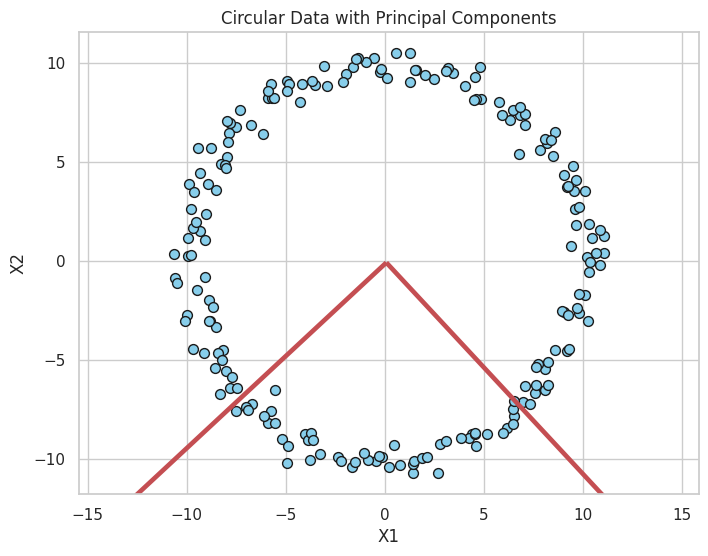

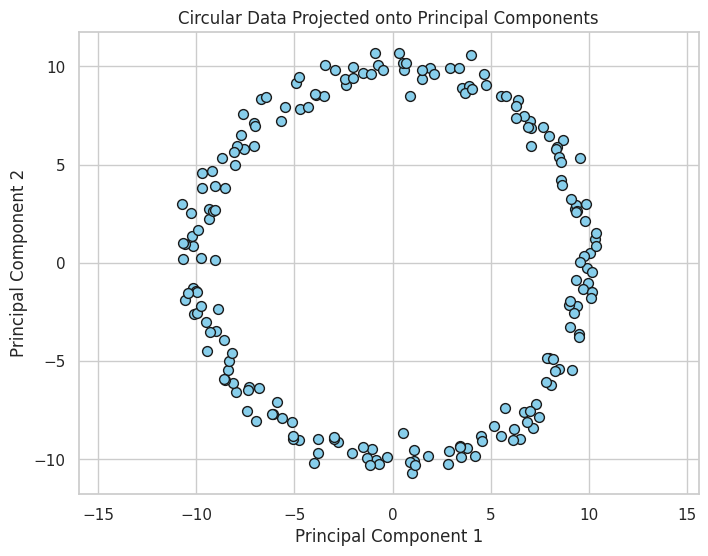

Eigenvalues (Top k) for Circular Data: [50.74955345 50.0862482 ]


In [ ]:
k = 2
circle_projected, eigenvalues_circle, eigenvectors_circle = perform_pca(circle_data, k)

# Visualize Circular Data with PCA components
plt.figure(figsize=(8, 6))
plt.scatter(circle_data[:, 0], circle_data[:, 1], color="skyblue", edgecolor="k", s=50)
mean_circle = np.mean(circle_data, axis=0)
for i in range(k):
    plt.quiver(*mean_circle, *eigenvectors_circle[:, i] * eigenvalues_circle[i] * 3, color="r", angles="xy", scale_units="xy", scale=1)
plt.title("Circular Data with Principal Components")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.show()

# Visualize Projected Circular Data based on k
plt.figure(figsize=(8, 6))
if k == 1:
    plt.scatter(circle_projected, np.zeros(circle_projected.shape), color="skyblue", edgecolor="k", s=50)
    plt.ylabel("")
elif k == 2:
    plt.scatter(circle_projected[:, 0], circle_projected[:, 1], color="skyblue", edgecolor="k", s=50)
    plt.ylabel("Principal Component 2")
plt.xlabel("Principal Component 1")
plt.title("Circular Data Projected onto Principal Components")
plt.axis("equal")
plt.show()

print("Eigenvalues (Top k) for Circular Data:", eigenvalues_circle)

In [ ]:
x_ellipse = 3 * radius * np.cos(angles) + np.random.normal(0, 0.5, num_points)
y_ellipse = 0.5 * radius * np.sin(angles) + np.random.normal(0, 0.5, num_points)
ellipse_data = np.vstack((x_ellipse, y_ellipse)).T

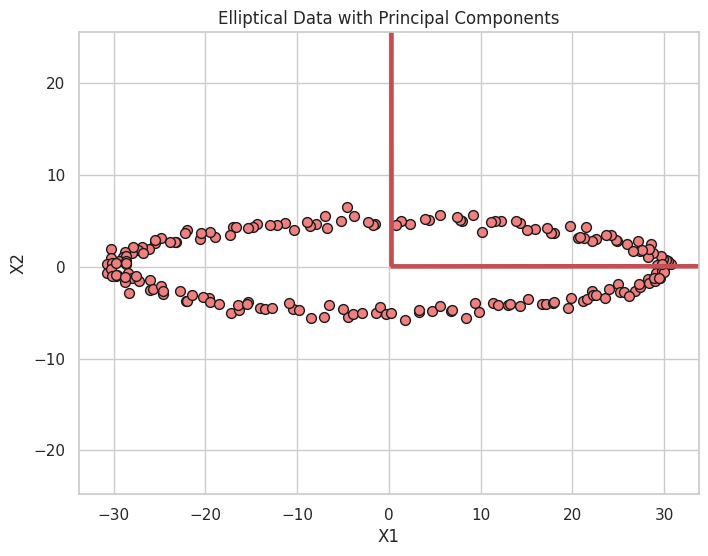

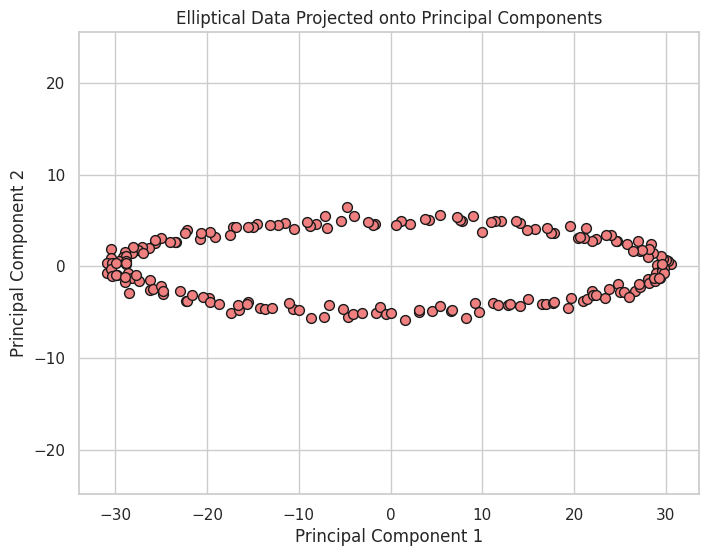

Eigenvalues (Top k) for Elliptical Data: [456.97990032  12.41476611]


In [ ]:
k=2
ellipse_projected, eigenvalues_ellipse, eigenvectors_ellipse = perform_pca(ellipse_data, k)

# Visualize Elliptical Data with PCA components
plt.figure(figsize=(8, 6))
plt.scatter(ellipse_data[:, 0], ellipse_data[:, 1], color="lightcoral", edgecolor="k", s=50)
mean_ellipse = np.mean(ellipse_data, axis=0)
for i in range(k):
    plt.quiver(*mean_ellipse, *eigenvectors_ellipse[:, i] * eigenvalues_ellipse[i] * 3, color="r", angles="xy", scale_units="xy", scale=1)
plt.title("Elliptical Data with Principal Components")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.show()

# Visualize Projected Elliptical Data based on k
plt.figure(figsize=(8, 6))
if k == 1:
    plt.scatter(ellipse_projected, np.zeros(ellipse_projected.shape), color="lightcoral", edgecolor="k", s=50)
    plt.ylabel("")
elif k == 2:
    plt.scatter(ellipse_projected[:, 0], ellipse_projected[:, 1], color="lightcoral", edgecolor="k", s=50)
    plt.ylabel("Principal Component 2")
plt.xlabel("Principal Component 1")
plt.title("Elliptical Data Projected onto Principal Components")
plt.axis("equal")
plt.show()

print("Eigenvalues (Top k) for Elliptical Data:", eigenvalues_ellipse)